In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['Microsoft YaHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

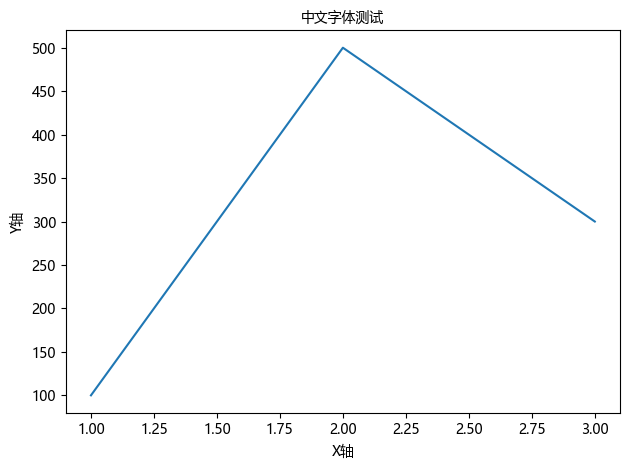

In [42]:
plt.plot([1,2,3], [100,500,300])
plt.title('中文字体测试', fontsize=10)
plt.xlabel('X轴', fontsize=10)
plt.ylabel('Y轴', fontsize=10)
plt.show()

In [4]:
import networkx as nx
import numpy as np
import pandas as pd
import random

import os
import math
import torch
from torch_geometric.data import Data

In [5]:
def standardization(data):
    mu = np.mean(data, axis=0)
    sigma = np.std(data, axis=0)
    return (data - mu) / sigma

In [6]:
def invert_dict(d):
    return dict([(v,k) for (k,v) in d.items()])

In [7]:
df1 = pd.read_csv(r"./data/data_x.csv",encoding='gbk')
df2 = pd.read_csv(r"./data/data_y.csv",encoding='gbk')
df2 = df2[['population_score', 'esf_score','lp_score']]
df = pd.concat([df1, df2], axis=1)
df

,Unnamed: 0,city,name,IntergrationValue_2,IntergrationValue_3,IntergrationValue_10,IntergrationValue_global,010000,050000,060000,...,120000,130000,140000,150000,160000,170000,bulit_time,population_score,esf_score,lp_score
0,0,上海,莘庄,3.00,2.50,5.62,12.86,63606,86058,85140,...,82527,81121,79013,82836,55170,83679,337,93.730854,17947.118398,65644.983406
1,1,上海,外环路,3.00,2.50,7.12,13.70,82776,111192,111351,...,101494,98174,95736,104819,66190,109091,337,98.025722,21802.171231,71006.414330
2,2,上海,莲花路,3.00,3.00,8.88,14.65,90877,123123,122849,...,112702,109068,106724,116126,74960,120684,337,102.352951,24154.384434,68617.706794
3,3,上海,锦江乐园,4.20,4.59,11.08,15.73,97546,132358,131805,...,122415,117475,115663,125813,80614,129541,337,104.243526,24139.493412,17510.871230
4,4,上海,上海南站,9.17,8.08,13.49,16.98,94215,127653,127311,...,118634,114359,112553,121382,79602,124961,337,148.339936,21802.171231,19405.906616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,101,青岛,琅琊,3.00,2.50,1.78,1.51,3156,7686,7951,...,4230,4744,5712,5576,1357,7035,30,3.430876,18185.617330,10552.683510
3177,102,青岛,贡口湾,3.00,2.50,1.62,1.37,3414,8258,8486,...,4561,5108,6167,6010,1464,7591,30,3.612353,18185.617330,11011.020931
3178,103,青岛,董家口港,3.00,2.50,1.43,1.23,3214,7981,8232,...,4019,4666,5769,5603,1288,7312,30,3.507180,18185.617330,12897.167590
3179,104,青岛,泊里,3.00,2.00,1.22,1.11,3049,7536,7907,...,3560,4306,5198,5042,1148,6869,30,3.360762,18185.617330,13763.678789


In [8]:
col_mask = df.columns.tolist()[3:]
df_ = df[col_mask]
# 记录每一列数据的最小最大值
df_min = df_.min()
df_max = df_.max()

df_ = (df_-df_.min())/(df_.max()-df_.min()) # min max 归一化
col_mask = df.columns.tolist()[0:3]
df = pd.concat([df[col_mask], df_], axis=1)
df

,Unnamed: 0,city,name,IntergrationValue_2,IntergrationValue_3,IntergrationValue_10,IntergrationValue_global,010000,050000,060000,...,120000,130000,140000,150000,160000,170000,bulit_time,population_score,esf_score,lp_score
0,0,上海,莘庄,0.134862,0.113895,0.247588,0.598990,0.484023,0.468876,0.465142,...,0.478384,0.497611,0.490353,0.473606,0.462781,0.467880,0.543548,0.472434,0.210656,0.191264
1,1,上海,外环路,0.134862,0.113895,0.327974,0.641414,0.629902,0.605816,0.608339,...,0.588330,0.602217,0.594135,0.599291,0.555220,0.609968,0.543548,0.494530,0.275522,0.209145
2,2,上海,莲花路,0.134862,0.151860,0.422294,0.689394,0.691548,0.670820,0.671156,...,0.653299,0.669043,0.662327,0.663938,0.628785,0.674789,0.543548,0.516793,0.315101,0.201179
3,3,上海,锦江乐园,0.215779,0.272589,0.540193,0.743939,0.742297,0.721136,0.720085,...,0.709603,0.720613,0.717802,0.719322,0.676213,0.724312,0.543548,0.526519,0.314850,0.030731
4,4,上海,上海南站,0.550910,0.537585,0.669346,0.807071,0.716949,0.695501,0.695533,...,0.687685,0.701499,0.698501,0.693988,0.667724,0.698703,0.543548,0.753387,0.275522,0.037052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3176,101,青岛,琅琊,0.134862,0.113895,0.041801,0.025758,0.024016,0.041876,0.043438,...,0.024520,0.029101,0.035449,0.031880,0.011383,0.039335,0.048387,0.007857,0.214669,0.007525
3177,102,青岛,贡口湾,0.134862,0.113895,0.033226,0.018687,0.025980,0.044993,0.046361,...,0.026439,0.031333,0.038272,0.034362,0.012280,0.042444,0.048387,0.008791,0.214669,0.009054
3178,103,青岛,董家口港,0.134862,0.113895,0.023044,0.011616,0.024458,0.043483,0.044974,...,0.023297,0.028622,0.035802,0.032035,0.010804,0.040884,0.048387,0.008250,0.214669,0.015344
3179,104,青岛,泊里,0.134862,0.075930,0.011790,0.005556,0.023202,0.041059,0.043198,...,0.020636,0.026414,0.032259,0.028827,0.009630,0.038407,0.048387,0.007497,0.214669,0.018234


In [9]:
city_counts = df['city'].value_counts().to_dict()
print(city_counts)

{'上海': 381, '北京': 346, '成都': 283, '广州': 245, '深圳': 236, '武汉': 213, '重庆': 191, '杭州': 169, '南京': 159, '西安': 153, '天津': 143, '郑州': 129, '青岛': 106, '宁波': 97, '合肥': 95, '南昌': 70, '无锡': 66, '厦门': 53, '福州': 46}


### 创建图

In [10]:
G = nx.Graph()
city_limit = -1
cities = []
n = 0
for city in city_counts.keys():
    if 0 <= city_limit <= n:
        break

    print(f"city: {city}")
    cities.append(city)
    city_df = df[df['city']== city]
    metro_df = pd.read_csv(f"./data/metro/{city}/data_{city}地铁_raw.csv")
    subG = nx.Graph()
    subG.city = {}
    for idx, row in city_df.iterrows():
        subG.add_node(f"{city}-{row['name']}",
                      city=city,
                      city_idx = n,
                      subset=n,
                      POI010000=row['010000'],
                      POI050000=row['050000'],
                      POI060000=row['060000'],
                      POI070000=row['070000'],
                      POI080000=row['080000'],
                      POI090000=row['090000'],
                      POI100000=row['100000'],
                      POI110000=row['110000'],
                      POI120000=row['120000'],
                      POI130000=row['130000'],
                      POI140000=row['140000'],
                      POI150000=row['150000'],
                      POI160000=row['160000'],
                      POI170000=row['170000'],
                      built_time = row['bulit_time'],
                      pop_score = row['population_score'],
                      lp_score = row['lp_score'],
                      esf_score = row['esf_score'],
                      int_2 = row['IntergrationValue_2'],
                      int_3 = row['IntergrationValue_3'],
                      int_10 = row['IntergrationValue_10'],
                      int_global = row['IntergrationValue_global'],
                      )# 防止重名

    # 创建连接
    for route_index in range(metro_df['route_index'].max() + 1):
        route_df = metro_df[metro_df['route_index'] == route_index]
        name_list = route_df["name"].tolist()
        route_name = route_df['route_name'].tolist()[0]
        for i in range(len(name_list) - 1):
            subG.add_edge(f"{city}-{name_list[i]}", f"{city}-{name_list[i+1]}")

    print(subG.number_of_nodes())

    G.add_nodes_from(subG.nodes.data())
    G.add_edges_from(subG.edges.data())
    n += 1


# 记录了key在data的第几列
DataKey2DataCol = { 'city':0,'city_idx':1,'subset':2,'POI010000':3,'POI050000':4,'POI060000':5,'POI070000':6,'POI080000':7,'POI090000':8,'POI100000':9,'POI110000':10,'POI120000':11,'POI130000':12,'POI140000':13,'POI150000':14,'POI160000':15,'POI170000':16,'built_time':17,'pop_score':18,'lp_score':19,'esf_score':20,'int_2':21,'int_3':22,'int_10':23,'int_global':24}

DataCol2DataKey = invert_dict(DataKey2DataCol)

DataKey2DfCol = {'POI010000':'010000','POI050000':'050000','POI060000':'060000','POI070000':'070000','POI080000':'080000','POI090000':'090000','POI100000':'100000','POI110000':'110000','POI120000':'120000','POI130000':'130000','POI140000':'140000','POI150000':'150000','POI160000':'160000','POI170000':'170000','built_time':'bulit_time','pop_score':'population_score','lp_score':'lp_score','esf_score':'esf_score','int_2':'IntergrationValue_2','int_3':'IntergrationValue_3','int_10':'IntergrationValue_10','int_global':'IntergrationValue_global'}

DfCol2DataCol = invert_dict(DataKey2DfCol)

city: 上海
381
city: 北京
346
city: 成都
283
city: 广州
245
city: 深圳
236
city: 武汉
212
city: 重庆
191
city: 杭州
169
city: 南京
159
city: 西安
153
city: 天津
143
city: 郑州
129
city: 青岛
106
city: 宁波
97
city: 合肥
95
city: 南昌
70
city: 无锡
66
city: 厦门
53
city: 福州
46



### 创建地铁站名字到idx的字典

In [11]:

node_map = {}
idx = 0
for node in G.nodes:
    node_map[node] = idx
    idx += 1
len(node_map)

3180

### 提取图中所有节点的data

In [12]:
node_datas = []
for node_data in G.nodes.data():
    node_datas.append(list(dict(node_data[1]).values()))
node_datas = np.array(node_datas)
node_datas

array([['上海', '0', '0', ..., '0.11389521640091116',
        '0.24758842443729903', '0.598989898989899'],
       ['上海', '0', '0', ..., '0.11389521640091116', '0.3279742765273312',
        '0.6414141414141413'],
       ['上海', '0', '0', ..., '0.15186028853454822',
        '0.42229367631296894', '0.6893939393939393'],
       ...,
       ['福州', '18', '18', ..., '0.11389521640091116',
        '0.05305466237942122', '0.06313131313131314'],
       ['福州', '18', '18', ..., '0.07593014426727411',
        '0.0337620578778135', '0.05303030303030302'],
       ['福州', '18', '18', ..., '0.0', '0.015541264737406218',
        '0.04444444444444444']], dtype='<U32')

### 分离X 和 Y

In [13]:
print(DataKey2DataCol)  # 参考

{'city': 0, 'city_idx': 1, 'subset': 2, 'POI010000': 3, 'POI050000': 4, 'POI060000': 5, 'POI070000': 6, 'POI080000': 7, 'POI090000': 8, 'POI100000': 9, 'POI110000': 10, 'POI120000': 11, 'POI130000': 12, 'POI140000': 13, 'POI150000': 14, 'POI160000': 15, 'POI170000': 16, 'built_time': 17, 'pop_score': 18, 'lp_score': 19, 'esf_score': 20, 'int_2': 21, 'int_3': 22, 'int_10': 23, 'int_global': 24}


In [14]:
# ref_data = (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,21,22,23,24)  # 数字参照DataKey2DataCol
# ref_data = (3,4,5,6,7,8,9,10,11,12,13,14,15,16,17)
ref_data = (17,21,22,23,24)
target_data = 16
x = node_datas[:,ref_data]
y = node_datas[:,target_data]

x = torch.tensor(x.astype(float),dtype=torch.float)
y = torch.tensor(y.astype(float),dtype=torch.float)

### 划分训练集 和 测试集

In [15]:
# 从 numpy arrary中移除key
def removeKeys(array,keys):
    array = list(array)
    key_to_remove = []
    for key in array:
        if key in keys:
            key_to_remove.append(key)
            print("found" + key)
    for key in key_to_remove:
        array.remove(key)
    array = np.array(array)
    return array

In [16]:
# 根据node_map 将多个key 映射为idx的np 数组
def keys_to_idx(keys):
    idx = []
    for key in keys:
        idx.append(node_map[key])
    idx = np.array(idx)
    return idx

In [17]:
all_nodes = np.array(list(G.nodes))
np.random.seed(123123)
np.random.shuffle(all_nodes)
train_nodes = all_nodes[0:500]
val_nodes = all_nodes[500: 1000]
test_nodes = all_nodes[1000: 3000]

keys_to_remove = ['南京-高家冲','南京-林山','南京-桥林新城','南京-石碛河', '南京-双垅','南京-兰花塘','南京-马骡圩']
train_nodes = removeKeys(train_nodes, keys_to_remove)
val_nodes = removeKeys(val_nodes, keys_to_remove)

train_idx = keys_to_idx(train_nodes)
val_idx = keys_to_idx(val_nodes)
test_idx = keys_to_idx(test_nodes)


found南京-桥林新城
found南京-兰花塘
found南京-林山


In [18]:
from torch_geometric.data import Data
data = Data(x=x, y=y)

# Add additional arguments to `data`:
data.train_idx = torch.tensor(train_idx, dtype=torch.long)
data.val_idx = torch.tensor(val_idx, dtype=torch.long)
data.test_idx = torch.tensor(test_idx, dtype=torch.long)
#data.test_mask = torch.tensor([...], dtype=torch.bool)

In [19]:
data.num_nodes

3180

In [20]:
data.num_node_features

5

In [21]:
data.num_edge_features

0

## 训练模型

In [22]:
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
import torch.nn  as nn


In [24]:
if torch.cuda.is_available():
    device_id = torch.cuda.current_device()
    print('using device', device_id, torch.cuda.get_device_name(device_id))
    device = torch.device("cuda")
else:
    device = "cpu"
print('DEVICE:', device)

using device 0 NVIDIA GeForce RTX 3070
DEVICE: cuda


In [25]:
class FC(torch.nn.Module):
    def  __init__(self, in_feats, h_feats1, h_feats2):
        super(FC, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(in_feats, h_feats1),
            nn.ReLU(),
            nn.Linear(h_feats1, h_feats2),
            nn.ReLU(),
            nn.Linear(h_feats2, 1)
        )

    def forward(self, data):
        x, batch = data.x, data.batch
        x = x.float()
        out = self.fc(x)
        out = torch.flatten(out)
        return out

In [26]:
import time
def train(epoch):
    #TRAIN
    t = time.time()
    model.train()
    out = model(data)
    optimizer.zero_grad()
    loss_train = criterion(out[data.train_idx], data.y[data.train_idx])
    loss_train.backward()
    optimizer.step()

    #VAL
    model.eval()
    out = model(data)
    loss_val = criterion(out[data.val_idx], data.y[data.val_idx])
    print('Epoch: {:04d}'.format(epoch+1),
          'loss_train: {:.4f}'.format(loss_train.item()),
          'loss_val: {:.4f}'.format(loss_val.item()),
          'time: {:.4f}s'.format(time.time() - t))
    return loss_train.data.item(), loss_val.data.item()

In [27]:
def test():
    model.eval()
    output = model(data)
    loss_test = criterion(output[data.test_idx], data.y[data.test_idx])
    print("Test set results:",
          "loss= {:.4f}".format(loss_test.item()))
    return loss_test

In [28]:
import glob

In [29]:

model = FC(in_feats=data.num_node_features, h_feats1=16, h_feats2=8).to(device)
criterion = torch.nn.MSELoss().to(device)                                       # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=1e-4)    # Define optimizer.
data.to(device)

epochs = 200
patience = 100
# Train model
t_total = time.time()
loss_train_values = []
loss_val_values = []
best_epoch = 0
best = epochs + 1
bad_counter = 0

for epoch in range(epochs):
    loss_train, loss_val = train(epoch)
    loss_val_values.append(loss_val)
    loss_train_values.append(loss_train)
    torch.save(model.state_dict(), '{}.pkl'.format(epoch + 1))
    if loss_val_values[-1] < best:
        best = loss_val_values[-1]
        best_epoch = epoch
        bad_counter = 0
    else:
        bad_counter += 1
    if bad_counter == patience:
        break

    files = glob.glob('*.pkl')
    for file in files:
        epoch_nb = int(file.split('.')[0])
        if epoch_nb < best_epoch:
            os.remove(file)

files = glob.glob('*.pkl')
for file in files:
    epoch_nb = int(file.split('.')[0])
    if epoch_nb > best_epoch:
        os.remove(file)
print("Optimization Finished!")
print("Total time elapsed: {:.4f}s".format(time.time() - t_total))
# Restore best model
print('Loading {}th epoch'.format(best_epoch))
model.load_state_dict(torch.load('{}.pkl'.format(best_epoch)))

Epoch: 0001 loss_train: 0.3146 loss_val: 0.2718 time: 2.1786s
Epoch: 0002 loss_train: 0.2838 loss_val: 0.2434 time: 0.0010s
Epoch: 0003 loss_train: 0.2548 loss_val: 0.2160 time: 0.0010s
Epoch: 0004 loss_train: 0.2266 loss_val: 0.1891 time: 0.0010s
Epoch: 0005 loss_train: 0.1989 loss_val: 0.1625 time: 0.0010s
Epoch: 0006 loss_train: 0.1714 loss_val: 0.1365 time: 0.0010s
Epoch: 0007 loss_train: 0.1445 loss_val: 0.1119 time: 0.0010s
Epoch: 0008 loss_train: 0.1188 loss_val: 0.0893 time: 0.0020s
Epoch: 0009 loss_train: 0.0949 loss_val: 0.0695 time: 0.0020s
Epoch: 0010 loss_train: 0.0738 loss_val: 0.0538 time: 0.0010s
Epoch: 0011 loss_train: 0.0564 loss_val: 0.0431 time: 0.0010s
Epoch: 0012 loss_train: 0.0440 loss_val: 0.0386 time: 0.0010s
Epoch: 0013 loss_train: 0.0375 loss_val: 0.0408 time: 0.0010s
Epoch: 0014 loss_train: 0.0377 loss_val: 0.0487 time: 0.0010s
Epoch: 0015 loss_train: 0.0435 loss_val: 0.0590 time: 0.0020s
Epoch: 0016 loss_train: 0.0520 loss_val: 0.0675 time: 0.0010s
Epoch: 0

<All keys matched successfully>

In [30]:
loss_test = test()

Test set results: loss= 0.0097


In [31]:
keys = test_nodes[:]
idx = test_idx[:]
out = model(data)[idx].cpu().detach().numpy()

df_col = DataKey2DfCol[DataCol2DataKey[target_data]]
max = df_max[df_col]
min = df_min[df_col]

out_value = out * (max - min) + min

org_value = data.y[idx].cpu().detach().numpy() * (max - min) + min

out_max = np.max(out_value)
org_max = np.max(org_value)
if out_max > org_max:
    max_value = out_max
else:
    max_value = org_max
result = np.array([np.array(keys),org_value, out_value]).T
result

array([['重庆-长生桥', '77670.0', '71534.91'],
       ['西安-延兴门', '47515.004', '53169.535'],
       ['深圳-沙头角', '73452.0', '72984.77'],
       ...,
       ['厦门-东瑶', '15225.0', '11312.035'],
       ['上海-西藏南路', '134038.0', '137033.34'],
       ['成都-南熏大道', '109137.0', '96700.266']], dtype='<U32')

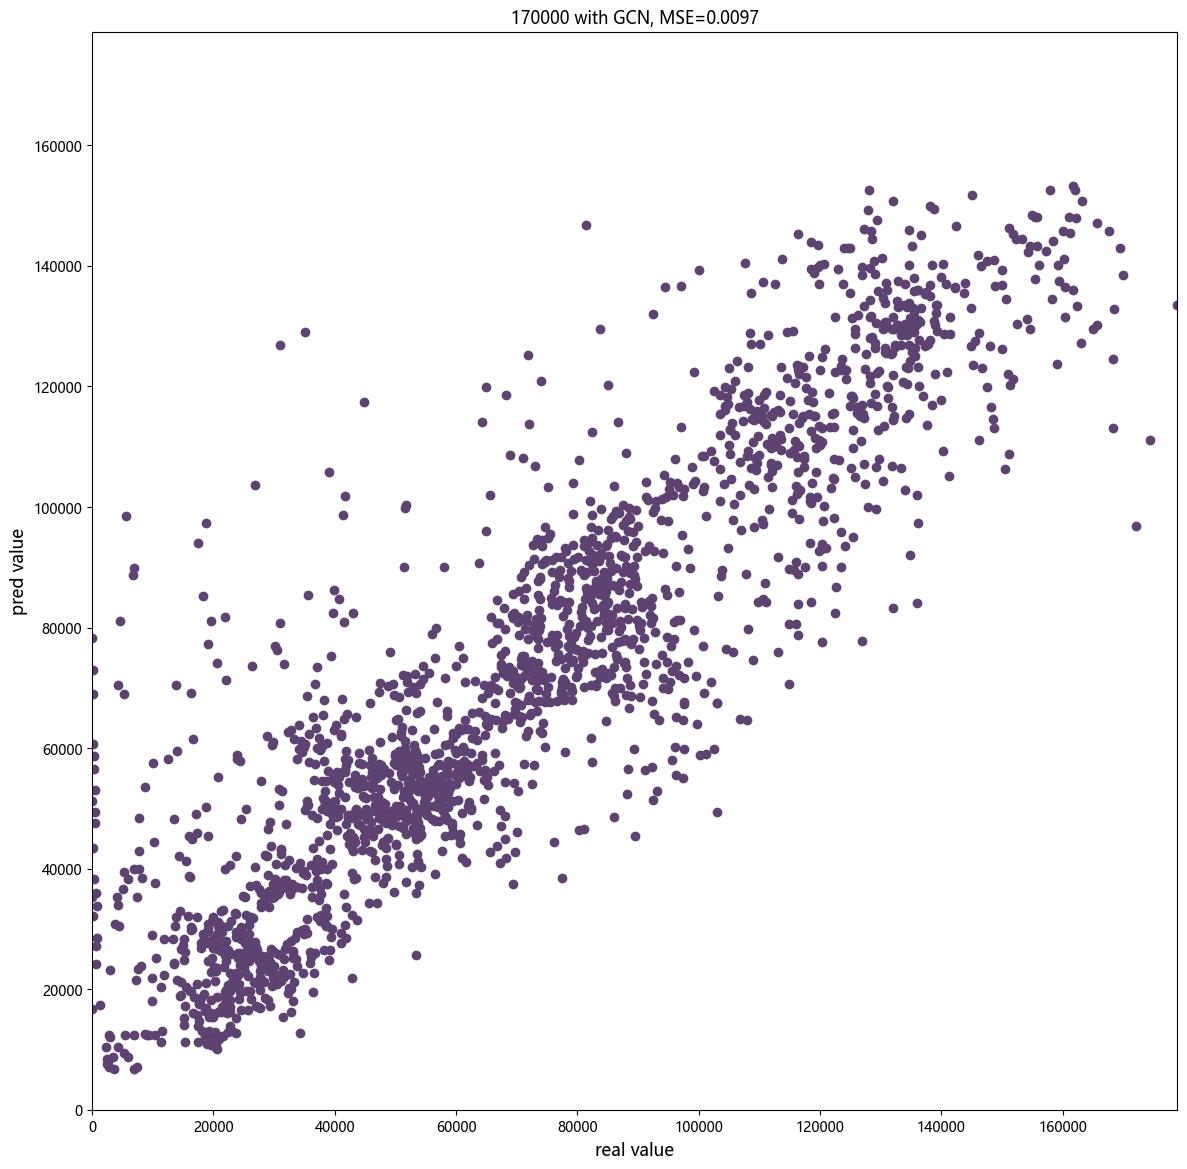

In [32]:
savefig = False

file_name = f'{df_col}_{time.strftime("%y%m%d%H%M%S")}'
title = f'{df_col}, MSE={loss_test:.4f}'


plt.figure(figsize=(14,14))
plt.title(title)
plt.xlim(0,max_value)
plt.ylim(0,max_value)
plt.scatter(x=org_value, y=out_value,c='#5d4272')
plt.gca().set_xlabel("real value",fontsize=12.5)
plt.gca().set_ylabel("pred value",fontsize=12.5)
if savefig:
    plt.savefig(f'output/ML/{file_name}.jpg', dpi=300)
else:
    plt.show()

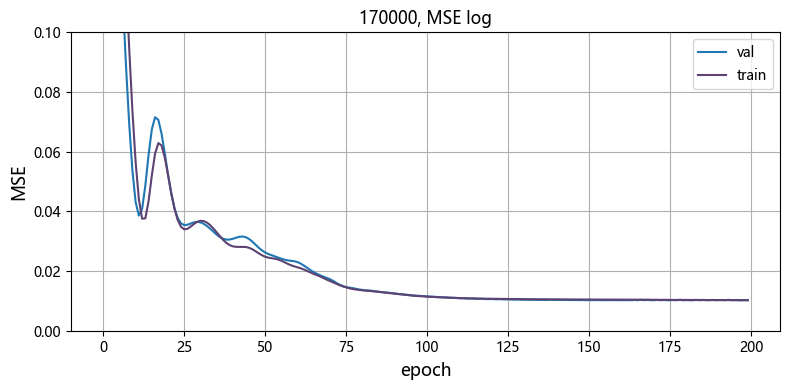

In [34]:
savefig = False

file_name = f'{df_col}_MSE_log_(in_feats=19, h_feats=16, out_feats=8)_{time.strftime("%y%m%d%H%M%S")}'
title = f'{df_col}, MSE log'


plt.figure(figsize=(8,4))
plt.rcParams["figure.autolayout"] = True
plt.title(title)
plt.ylim(0,0.1)
plt.plot(loss_val_values,label = 'val')
plt.plot(loss_train_values,label = 'train',c='#5d4272')
plt.gca().set_xlabel("epoch",fontsize=12.5)
plt.gca().set_ylabel("MSE",fontsize=12.5)
plt.grid(True)
plt.legend()
if savefig:
    plt.savefig(f'output/ML/{file_name}.jpg', dpi=300)
else:
    plt.show()

## 提取数据

In [35]:
keys = ['南京-高家冲','南京-林山','南京-桥林新城','南京-石碛河', '南京-双垅','南京-兰花塘','南京-马骡圩']
idx = keys_to_idx(keys)
out = model(data)[idx].cpu().detach().numpy()
df_col = DataKey2DfCol[DataCol2DataKey[target_data]]
max = df_max[df_col]
min = df_min[df_col]
out_value = out * (max - min) + min
result = np.array([np.array(keys), out_value]).T
result

array([['南京-高家冲', '24226.557'],
       ['南京-林山', '32110.592'],
       ['南京-桥林新城', '35779.355'],
       ['南京-石碛河', '37384.664'],
       ['南京-双垅', '39203.133'],
       ['南京-兰花塘', '41388.473'],
       ['南京-马骡圩', '43467.23']], dtype='<U32')

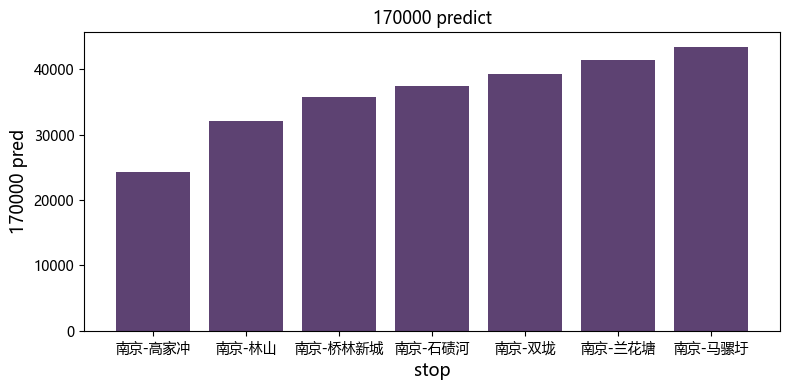

In [39]:
savefig = False
title = f'{df_col} predict'
file_name = f'{df_col}_{time.strftime("%y%m%d%H%M%S")}'

plt.figure(figsize=(8,4))
ax = plt.bar(result[:,0], result[:,1].astype(float), color='#5d4272')
plt.gca().set_xlabel("stop",fontsize=12.5)
plt.gca().set_ylabel(f"{df_col} pred",fontsize=12.5)
plt.title(title)
if savefig:
    plt.savefig(f'output/ML/{file_name}.jpg', dpi=300)
    result_df = pd.DataFrame(result)
    result_df.to_csv(f'output/ML/{file_name}.csv',encoding='gbk')
else:
    plt.show()